Load dataset

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset


**PART 1 : IMPORT AND SETUP**

Import necessary libraries

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [12]:
df_heart = pd.read_csv(f"{path}/heart.csv")

Display first 10 rows

In [13]:
print(df_heart.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

Display last 10 rows

In [14]:
print(df_heart.tail(10))

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1015   58    1   0       128   216    0        0      131      1      2.2   
1016   65    1   3       138   282    1        0      174      0      1.4   
1017   53    1   0       123   282    0        1       95      1      2.0   
1018   41    1   0       110   172    0        0      158      0      0.0   
1019   47    1   0       112   204    0        1      143      0      0.1   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1015      1   3     3       0  
1016      1   1     2       0  
1017      1   2     3       0  
1018      2   0     3   

**PART 2 : GLOBAL DISTRIBUTION**

Display the distribution of the nnumerics columns

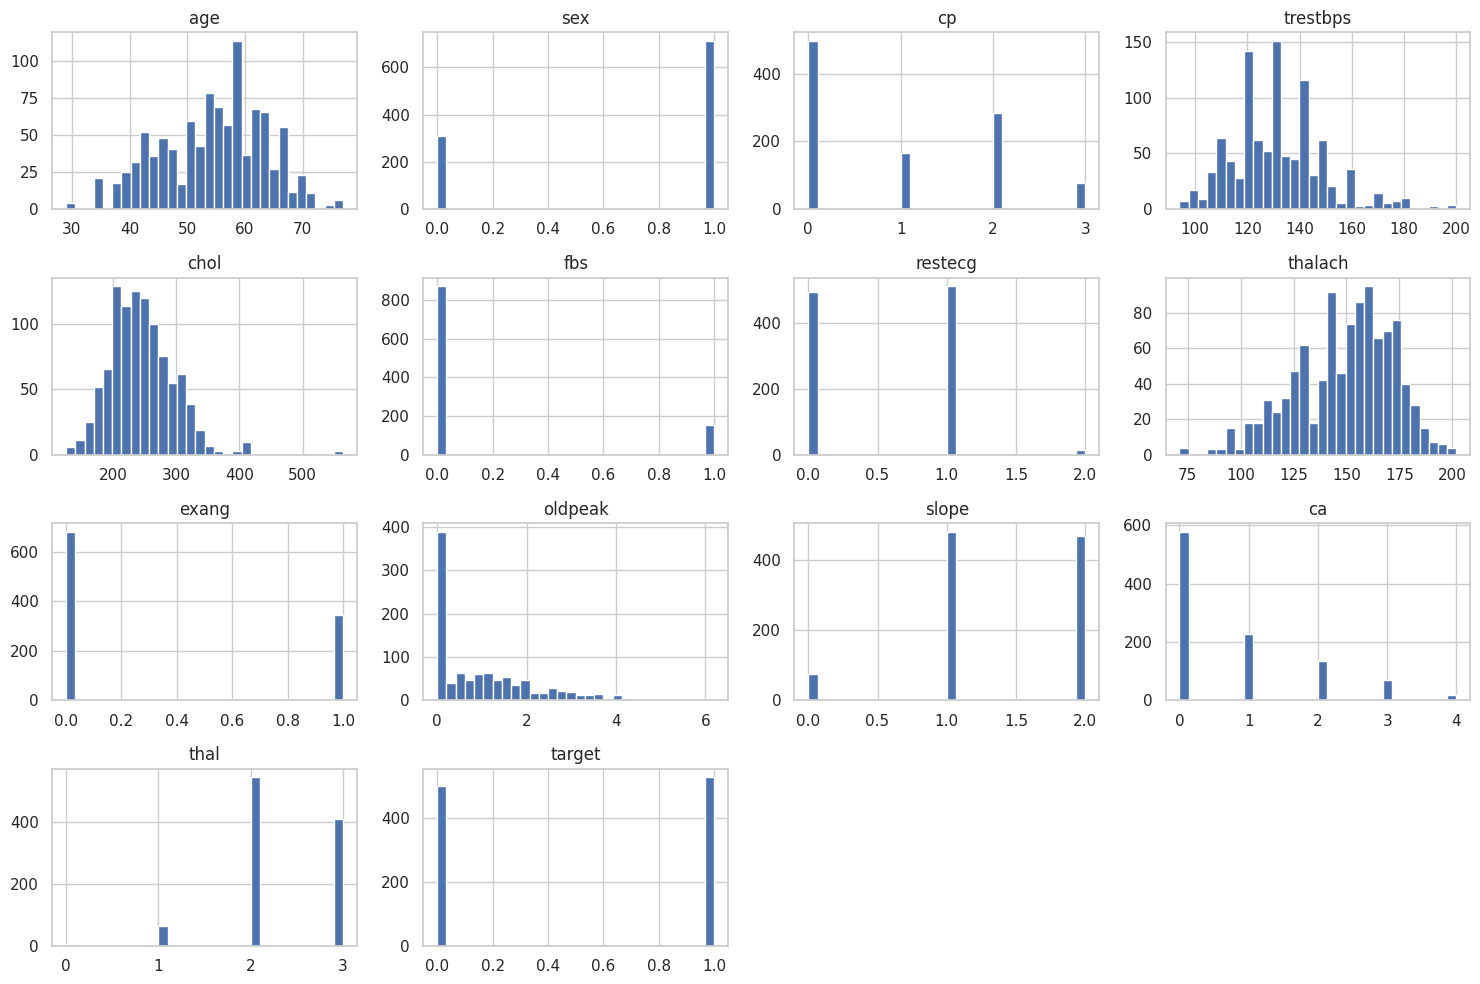

In [15]:
df_heart.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

Interpretation of the each plot's shape

==>Age: The distribution is fairly symmetric with a moderate spread; no extreme outliers are visible.


==>Sex: This is a binary variable (0 or 1), so the boxplot shows no spread beyond these two values.


==>cp (Chest Pain Type): Values range from 0 to 3 with a balanced spread; no significant outliers.


==>trestbps (Resting Blood Pressure): Centered around 120–140, but there are a few high outliers above 180.


==>chol (Cholesterol): Median near 240 with several high outliers above 400, indicating right skewness.


==>fbs (Fasting Blood Sugar): Binary variable (0 or 1), so no spread beyond these points.
restecg (Resting ECG): Spread between 0 and 2 with no major outliers.


==>thalach (Max Heart Rate): Mostly around 150, with a few low outliers below 100.
exang (Exercise-Induced Angina): Binary variable (0 or 1), so no spread.


==>oldpeak (ST Depression): Skewed with several high outliers above 4, suggesting variability.


==>slope: Spread between 0 and 2; no extreme outliers.


==>ca (Number of Major Vessels): Mostly low values, but outliers exist at higher counts (3–4).


==>thal: Spread between 0 and 3; no extreme outliers.
target: Binary variable (0 or 1), so no spread.

**PART 3:Detailed distribution of Individual Attributes**

plot distribution foreach numeric values

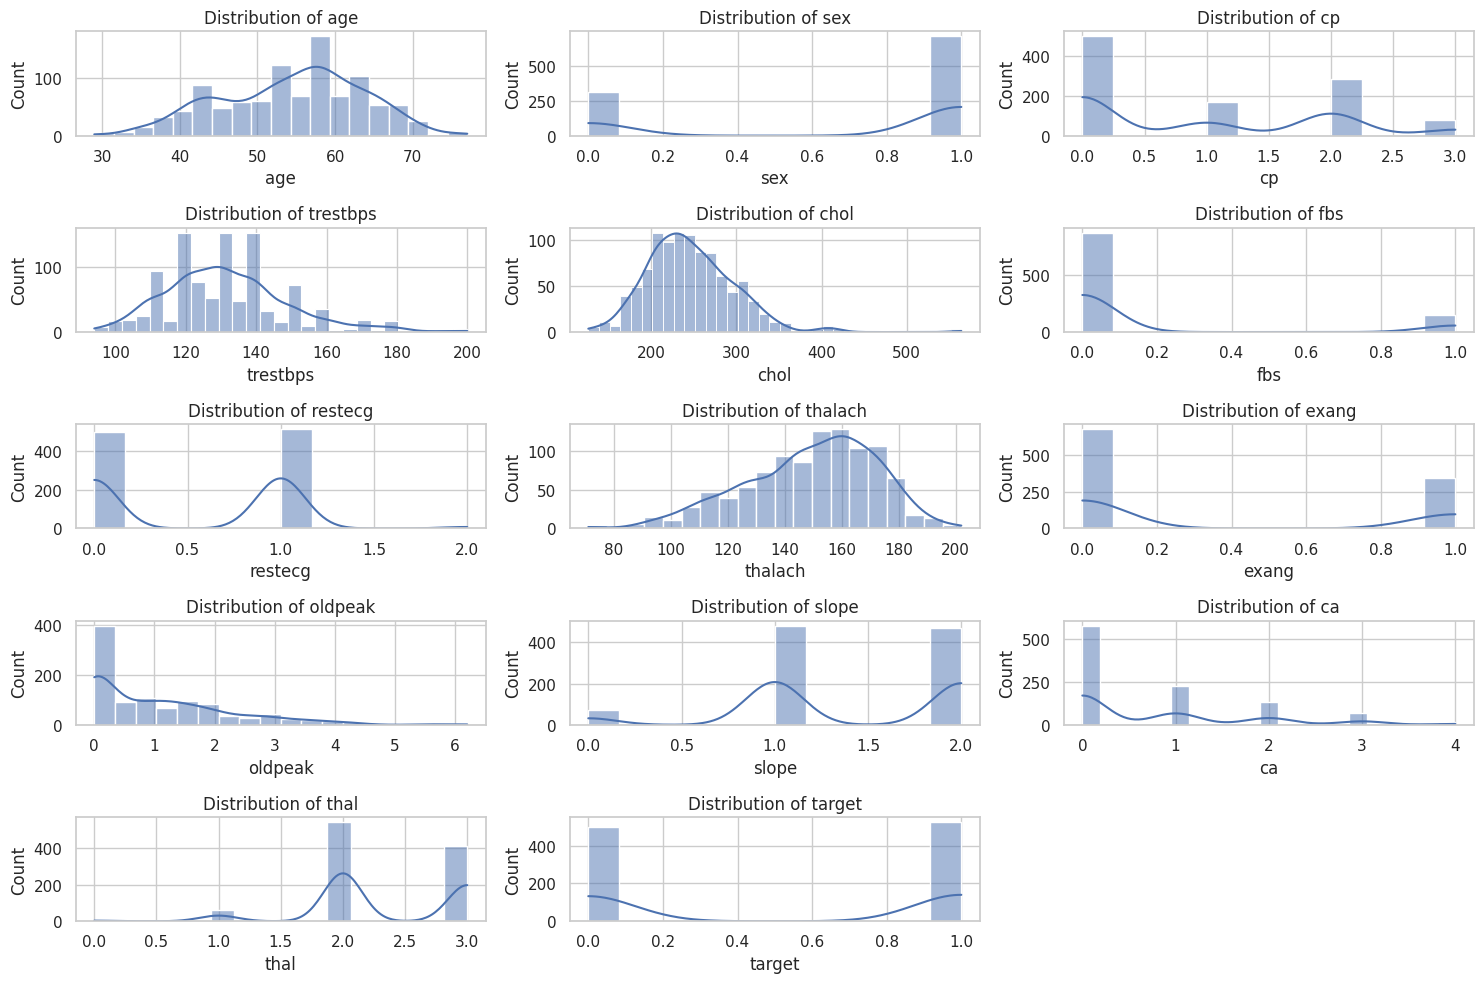

In [16]:

numeric_cols = df_heart.select_dtypes(include=['int64', 'float64']).columns


# Create grid layout
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(df_heart[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



Identify outliers per attribute

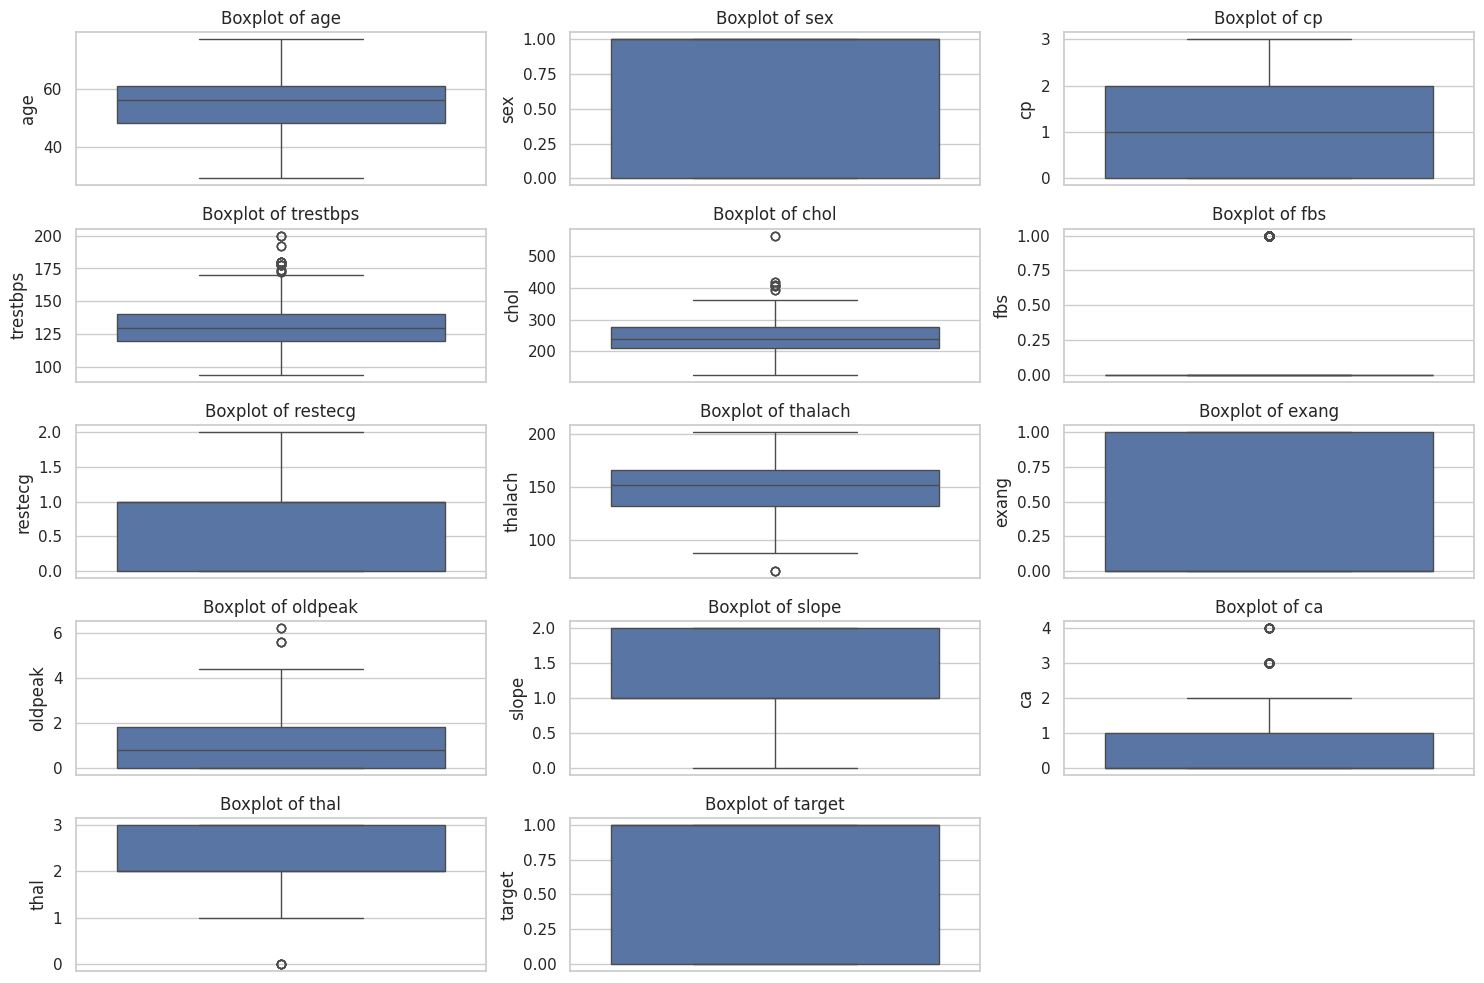

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # Adjust grid layout
    sns.boxplot(y=df_heart[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Interpreting cach plot's shape and spread

===>Age: The distribution is fairly symmetric with a moderate spread; most ages cluster around the median with few outliers.


===>Sex: This is a binary variable, so the boxplot shows two distinct categories without spread.



===>cp (chest pain type): The spread is moderate with a few outliers; values are concentrated near the lower end.



===>trestbps (resting blood pressure): The distribution is tight around the median, but there are several high-value outliers.



===>chol (cholesterol): Most values cluster near the median, with a few high outliers indicating skewness.



===>fbs (fasting blood sugar): Another binary variable, so no spread—just two distinct categories.



===>restecg (resting ECG): Spread is moderate with no extreme outliers; values are evenly distributed.



===>thalach (maximum heart rate achieved): Wide spread with a low outlier; most values are above the median.



===>exang (exercise-induced angina): Binary variable, so no spread—two distinct categories.



===>oldpeak (ST depression): Skewed with several high outliers; most values are near zero.



===>slope: Spread is moderate with no extreme outliers; values cluster around the median.



===>ca (number of major vessels): Skewed with a few high outliers; most values are near zero.



===>thal: Spread is moderate with a low outlier; values cluster around the median.



===>target: Binary variable, so no spread—two distinct categories.

**PART 4: Pairwaise relationships:**

Show pairwise relationships

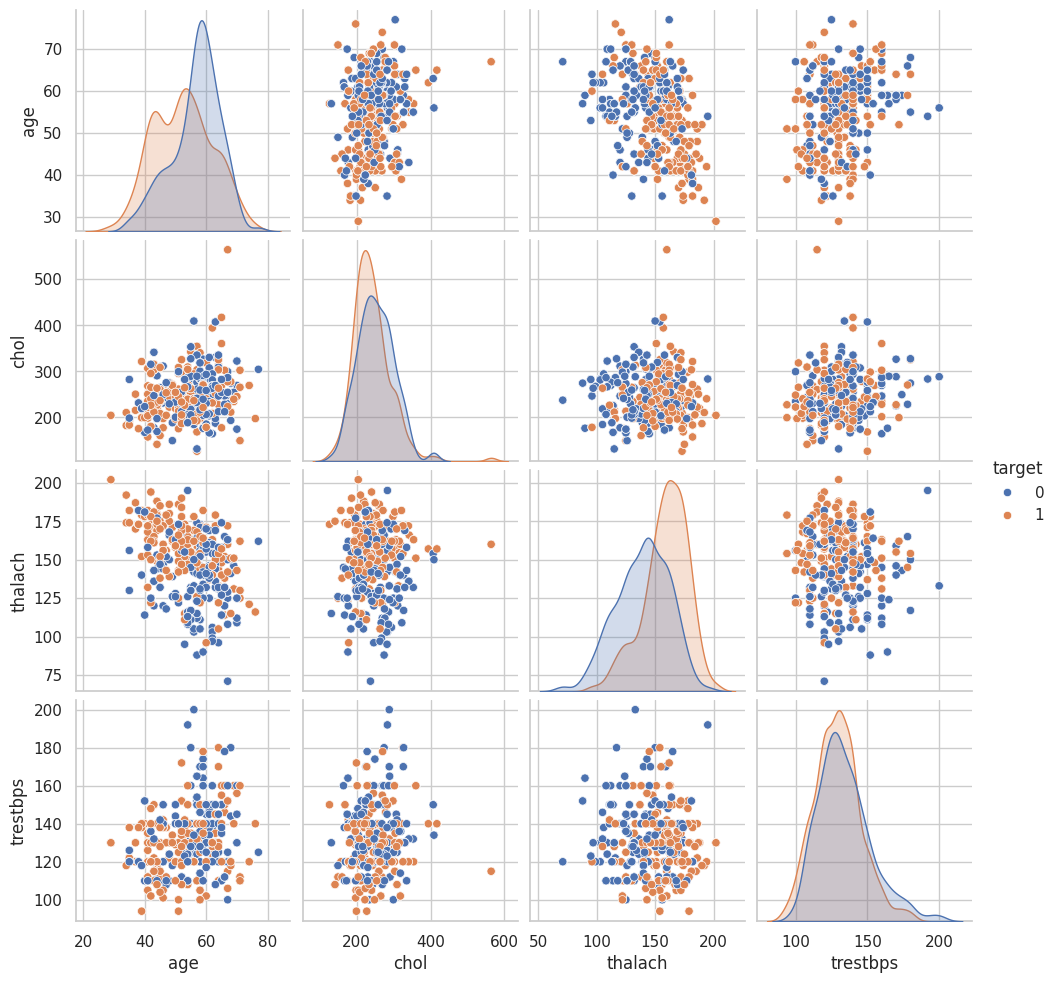

In [18]:
sns.pairplot(df_heart[['age', 'chol', 'thalach', 'trestbps', 'target']], hue='target', diag_kind='kde')

Observations

===>Age vs. Thalach (Max Heart Rate):

There is a clear negative trend: as age increases, thalach tends to decrease.
Patients with heart disease (target = 1, orange) generally have lower thalach values compared to those without disease.



===>Age vs. Chol (Cholesterol):

No strong linear pattern, but cholesterol seems slightly higher for older individuals.
Both target groups are mixed, so cholesterol alone does not strongly separate the classes.



===>Thalach vs. Chol:

No visible correlation; points are scattered.
However, patients with heart disease (orange) cluster more toward lower thalach values.



===>Trestbps (Resting BP):

No strong correlation with age or cholesterol; points are widely spread.
Both target groups overlap significantly, so resting BP is not a strong differentiator.



===>Clusters by Target

The most noticeable separation is along thalach:

Higher thalach values (above ~150) are mostly non-disease (blue).
Lower thalach values (below ~130) have more disease cases (orange).

**PART 5: Correlation and Heatmap text**

Correlation matrix:

In [19]:
corr_matrix=df_heart.corr()
print(corr_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

Plot a heatmap:

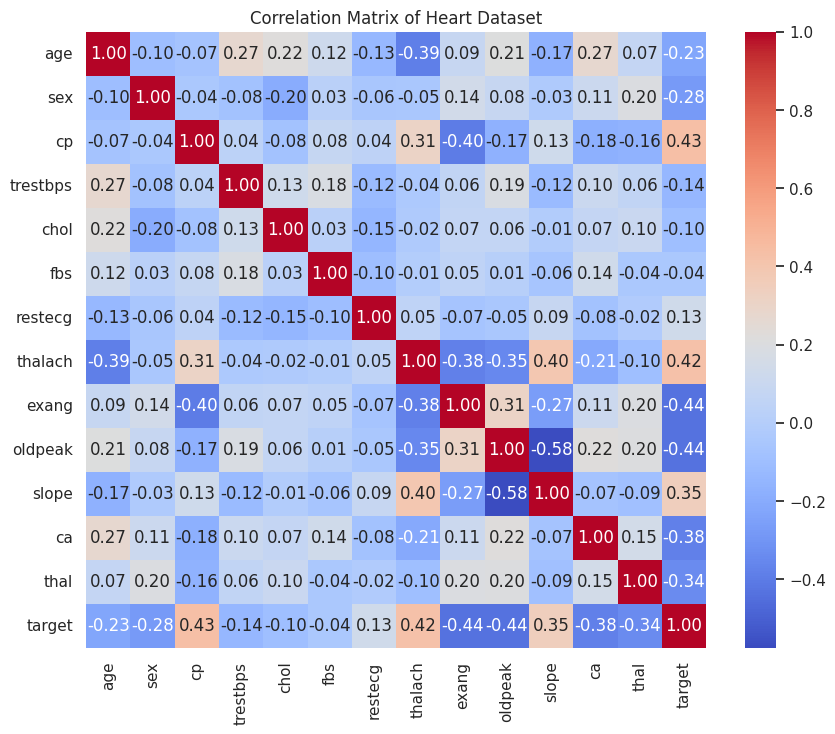

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Heart Dataset")
plt.show()

Top 3 strongest correlations:

===>oldpeak and slope:
Correlation ≈ -0.58 (strong negative correlation).


===>cp (chest pain type) and target:
Correlation ≈ +0.43 (moderate positive correlation).


===>thalach (max heart rate) and target:
Correlation ≈ +0.42 (moderate positive correlation).

**PART6 : Scatter and Regression Plot for top 3 correlations:**

Create a scatter plot with regression line foreach top correlated pair:

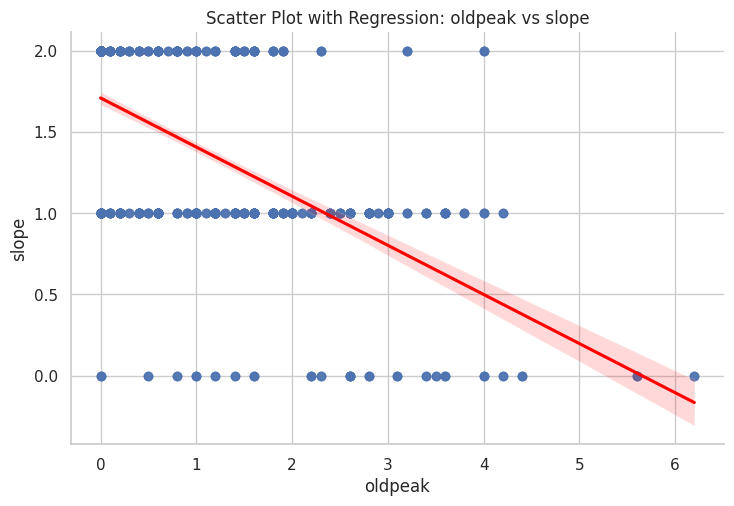

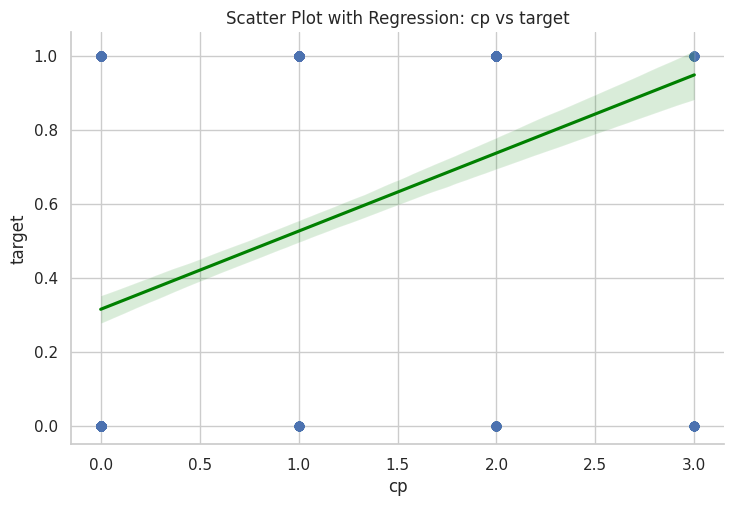

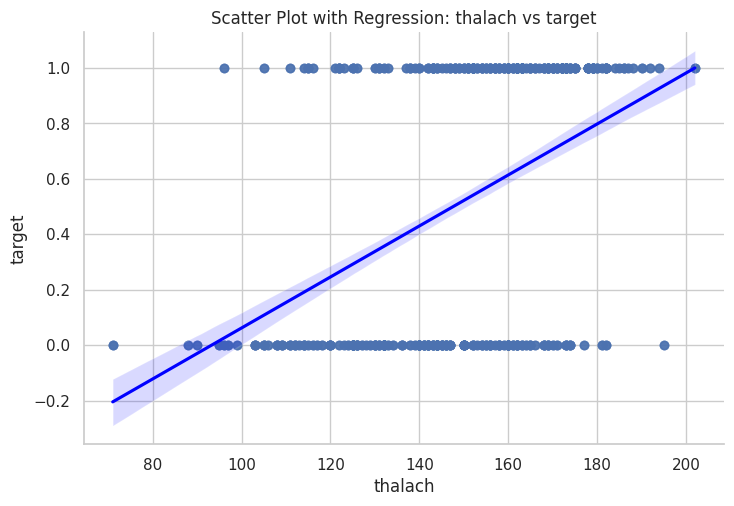

In [21]:

sns.set(style="whitegrid")

# 1. oldpeak vs slope
sns.lmplot(x='oldpeak', y='slope', data=df_heart, aspect=1.5, height=5,
           scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression: oldpeak vs slope')
plt.show()

# 2. cp vs target
sns.lmplot(x='cp', y='target', data=df_heart, aspect=1.5, height=5,
           scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title('Scatter Plot with Regression: cp vs target')
plt.show()

# 3. thalach vs target
sns.lmplot(x='thalach', y='target', data=df_heart, aspect=1.5, height=5,
           scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title('Scatter Plot with Regression: thalach vs target')
plt.show()


color or facet by the target variable in regression plots

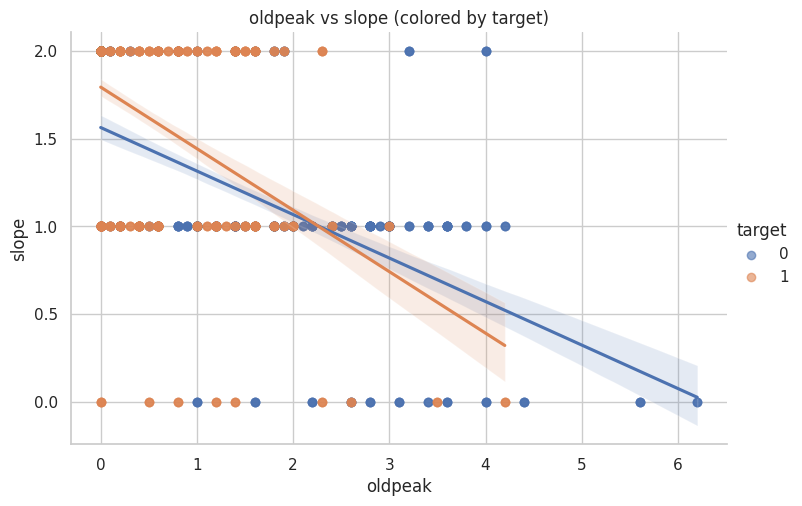

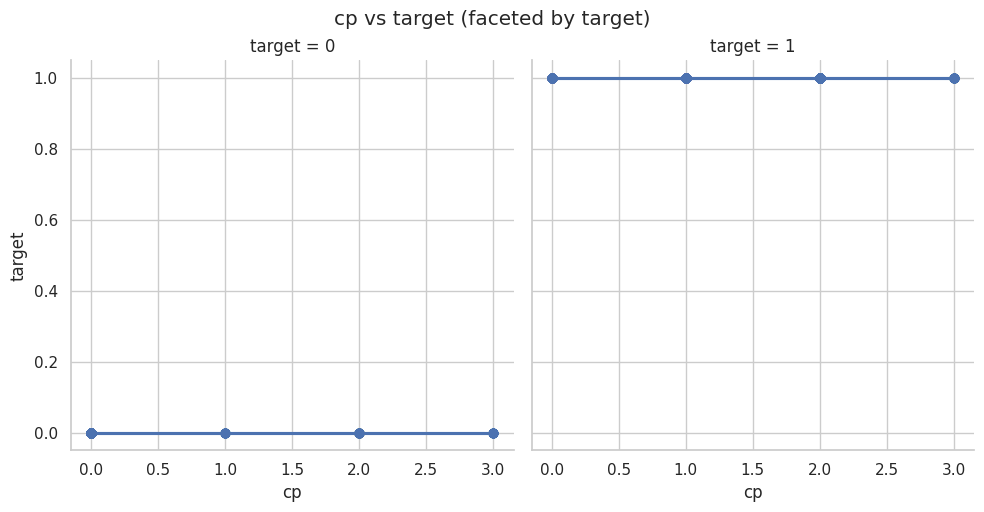

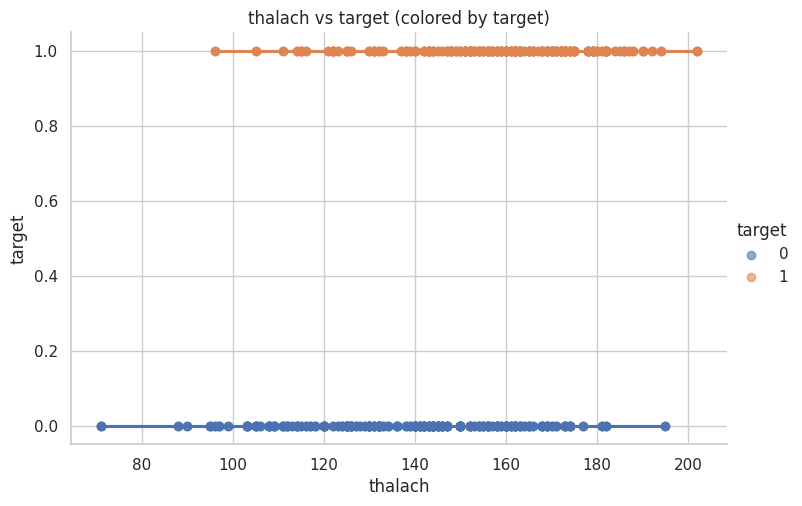

In [22]:
sns.set(style="whitegrid")

# 1. oldpeak vs slope, colored by target
sns.lmplot(x='oldpeak', y='slope', hue='target', data=df_heart,
           aspect=1.5, height=5, scatter_kws={'alpha':0.6})
plt.title('oldpeak vs slope (colored by target)')
plt.show()

# 2. cp vs target (hue is not needed because target is already y, but we can facet by target)
sns.lmplot(x='cp', y='target', data=df_heart, col='target',
           aspect=1, height=5, scatter_kws={'alpha':0.6})
plt.suptitle('cp vs target (faceted by target)', y=1.02)
plt.show()

# 3. thalach vs target, colored by target
sns.lmplot(x='thalach', y='target', hue='target', data=df_heart,
           aspect=1.5, height=5, scatter_kws={'alpha':0.6})
plt.title('thalach vs target (colored by target)')
plt.show()


Interept how the scatter plots change between patients with and without heart disease

===>oldpeak vs slope: Relationship changes between groups (steeper decline for healthy patients).



===>cp vs target: Shows categorical separation, not a trend.



===>thalach vs target: Clear pattern-heart disease patients have lower max heart rates.

**PART 7: Categorical conversation and Pie Chart:**

Convert "target" variable to a new categorical variable

In [23]:
df_heart['HeartDisease'] = df_heart['target'].map({1: 'Yes', 0: 'No'})

print(df_heart[['target', 'HeartDisease']].head())


   target HeartDisease
0       0           No
1       0           No
2       0           No
3       0           No
4       0           No


create a new dataframe df_hd including the enw column

In [24]:
df_hd = df_heart.copy()

print(df_hd.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target HeartDisease  
0   2     3       0           No  
1   0     3       0           No  
2   0     3       0           No  
3   1     3       0           No  
4   3     2       0           No  


plot a pie chart of the proportions of patients with and without heart disease

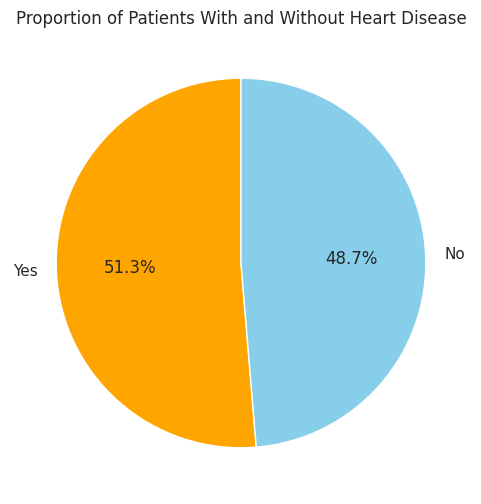

In [25]:
# Count the proportions of heartDisease
counts = df_hd['HeartDisease'].value_counts()
labels = counts.index
sizes = counts.values

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'skyblue'])
plt.title('Proportion of Patients With and Without Heart Disease')
plt.show()

**PART 8: Boxplots by categorical outcome:**

plot a boxplot foreach numeric attribute :

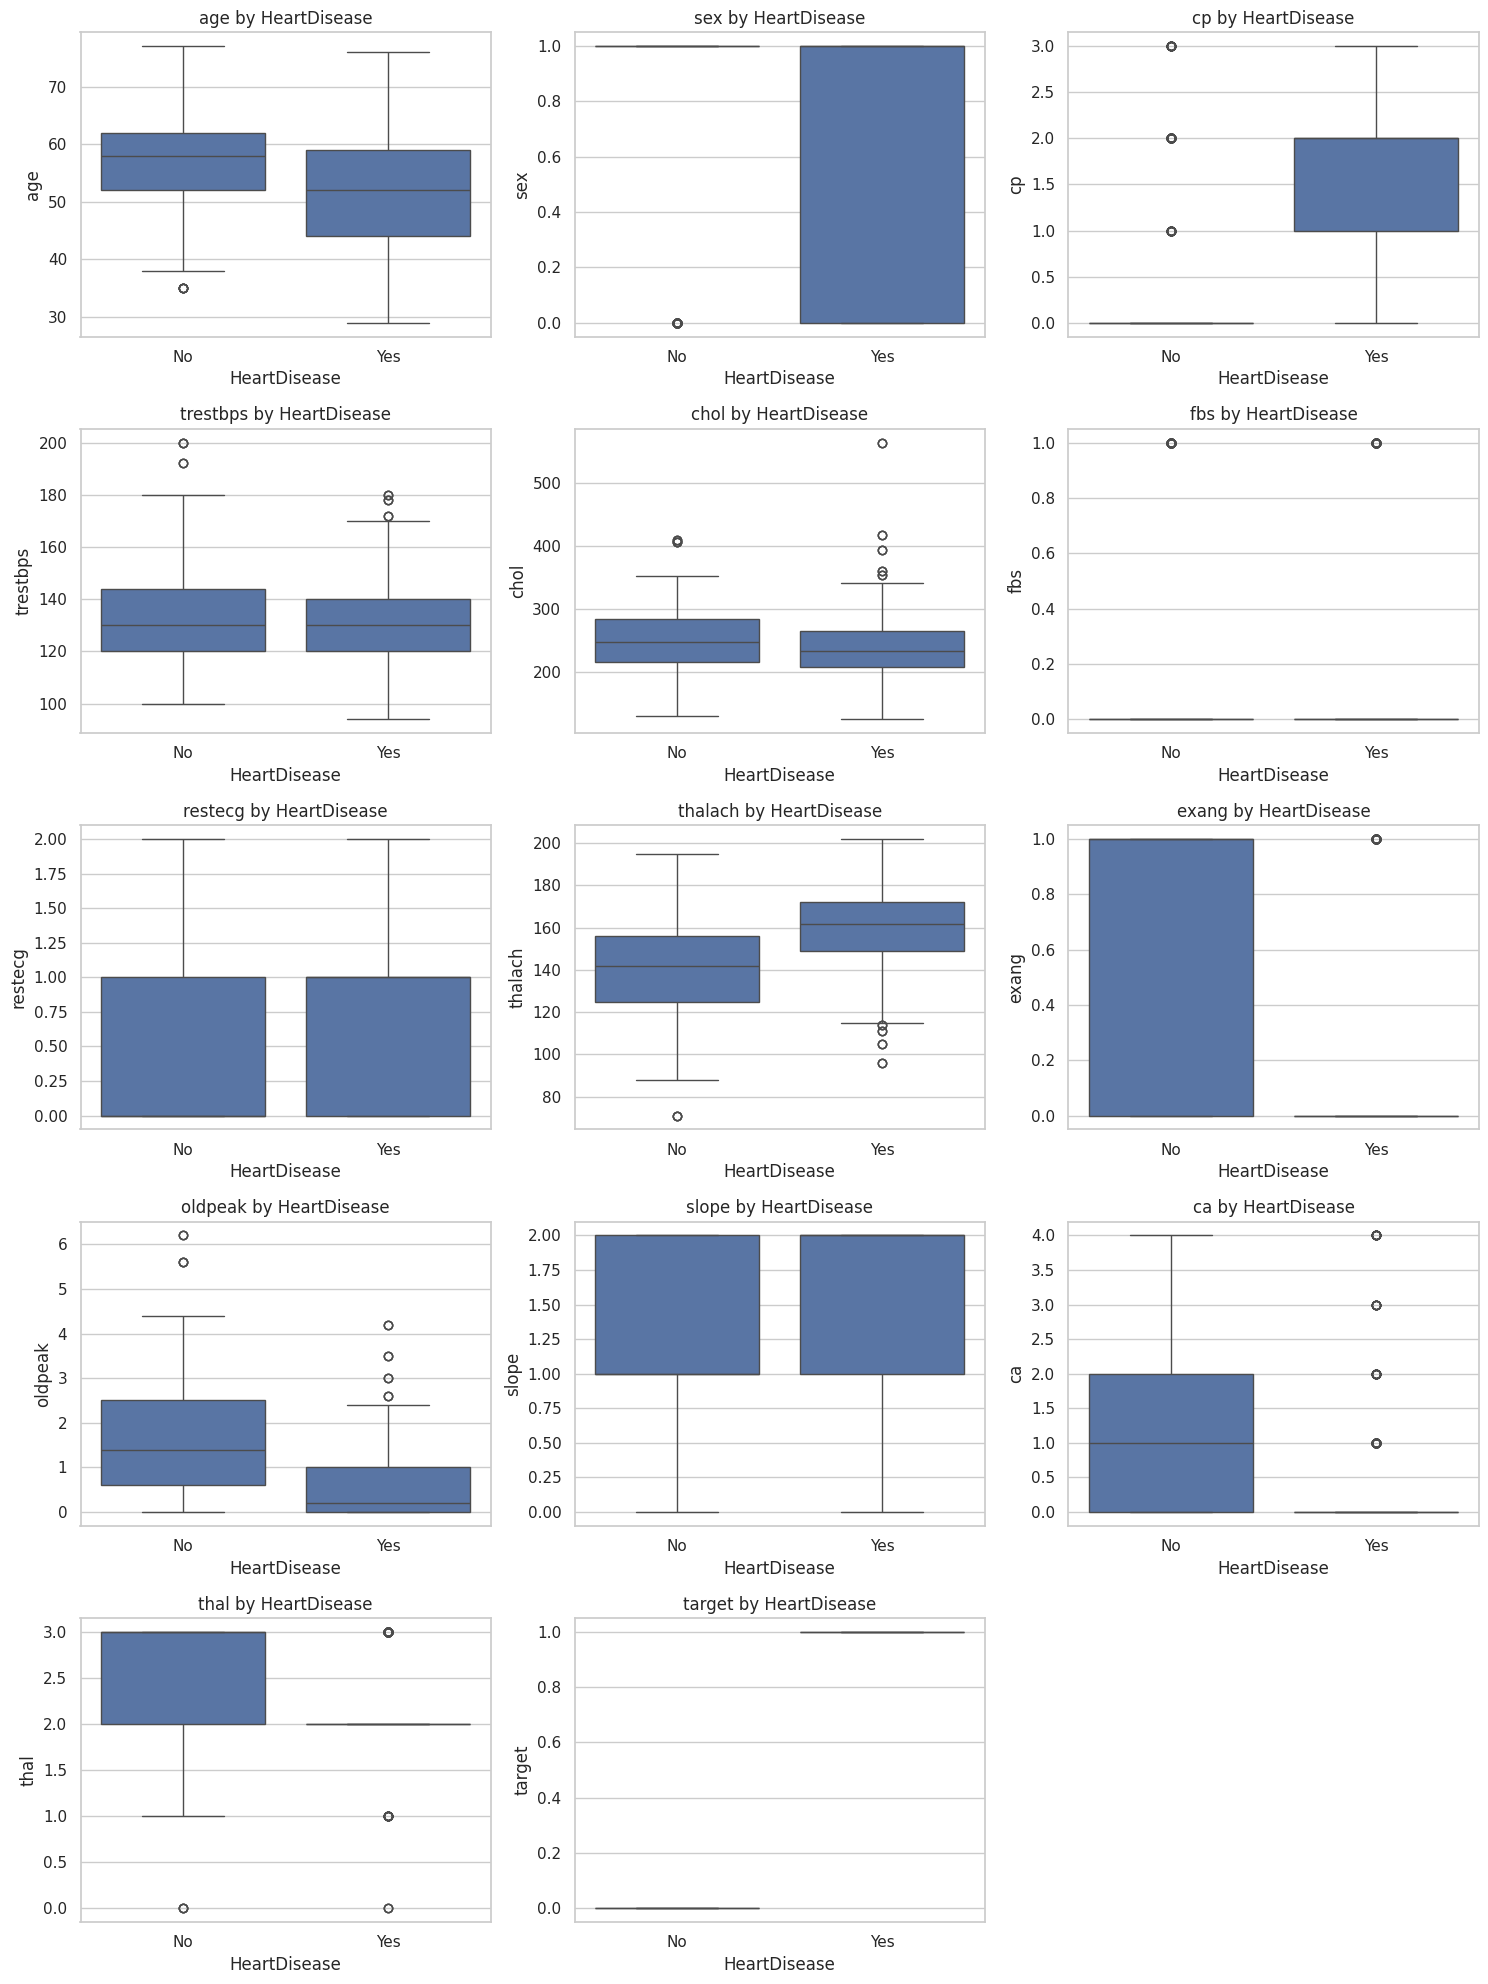

In [28]:
# Select numeric columns
numeric_cols = df_hd.select_dtypes(include=['int64', 'float64']).columns
# exclude target
numeric_cols = [col for col in numeric_cols if col != 'HeartDisease']

# Grid size
n_cols = 3  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x='HeartDisease', y=col, data=df_hd, ax=axes[i])
    axes[i].set_title(f'{col} by HeartDisease')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


compare how the distribution of each attribute differs between patients with and without heart disease

1. Age

Patients with heart disease tend to be slightly older on average.
The median age for the “Yes” group is higher than for the “No” group.

2. Sex

There is a strong imbalance: most heart disease cases are concentrated in one sex category (likely male, given typical datasets).

3. Chest Pain Type (cp)

Patients without heart disease show more variation in chest pain types.
Those with heart disease mostly fall into one or two categories.

4. Resting Blood Pressure (trestbps)

Both groups have similar medians, but the “Yes” group has slightly higher variability and more outliers.

5. Cholesterol (chol)

Cholesterol levels are similar across groups, but the “No” group shows more extreme outliers.

6. Fasting Blood Sugar (fbs)

Very little difference between groups; most values are clustered near 0.

7. Resting ECG (restecg)

Both groups have similar distributions, suggesting this feature may not strongly differentiate heart disease.

8. Max Heart Rate (thalach)

Patients with heart disease tend to have lower maximum heart rates.
This is a strong differentiator.

9. Exercise-Induced Angina (exang)

Patients with heart disease are much more likely to have exercise-induced angina.

10. Oldpeak (ST depression)

Higher oldpeak values are associated with heart disease.
This is another strong differentiator.

11. Slope

Slight differences, but both groups share similar ranges.

12. Number of Major Vessels (ca)

Patients with heart disease tend to have higher values (more blocked vessels).

13. Thalassemia (thal)

Clear difference: certain thal values are more common in heart disease cases.

**PART 9: Advanced Subplots / mini Dashboard:**

create a figure with multiple subplots (histogram , boxplot , pie chart) in a grid layout to summarize the dataset visually

/tmp/ipython-input-1282327738.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='thalach', data=df_hd, ax=axes[0, 1], palette='Set2')


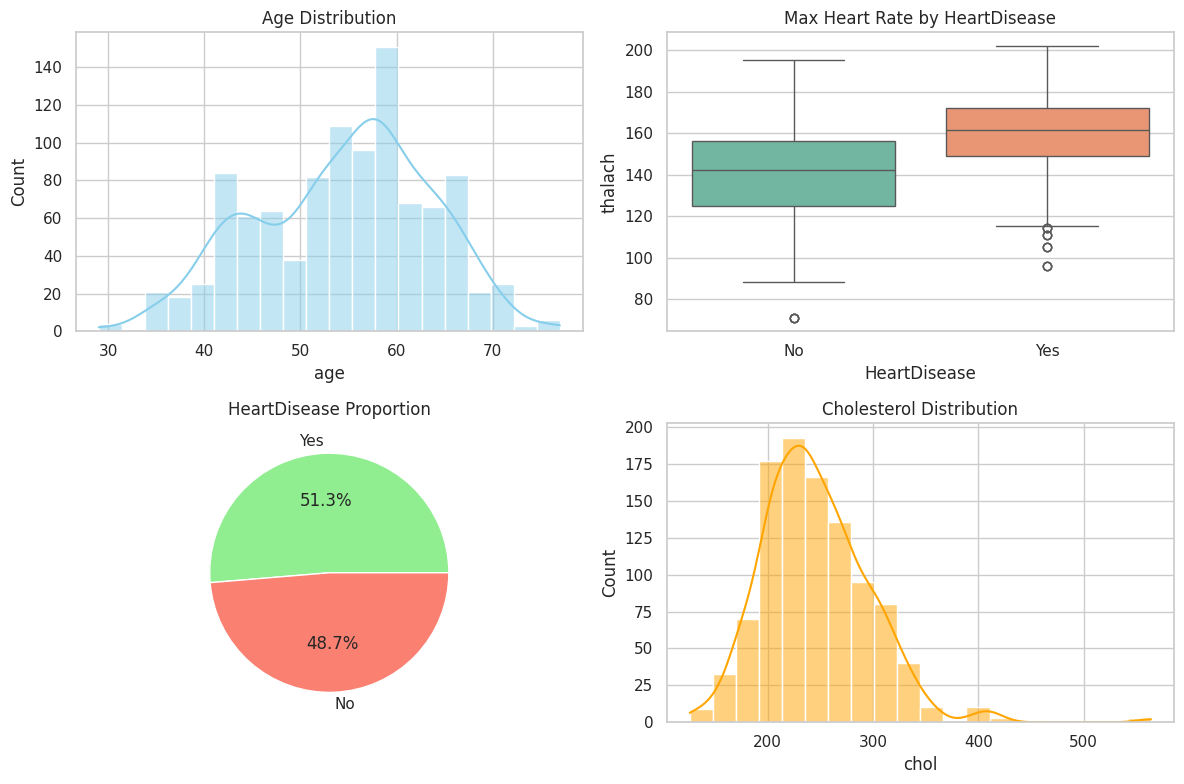

In [29]:
# Create figure with grid layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for Age
sns.histplot(df_hd['age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

# Boxplot for Max Heart Rate by HeartDisease
sns.boxplot(x='HeartDisease', y='thalach', data=df_hd, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Max Heart Rate by HeartDisease')

# Pie chart for HeartDisease proportion
heart_counts = df_hd['HeartDisease'].value_counts()
axes[1, 0].pie(heart_counts, labels=heart_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
axes[1, 0].set_title('HeartDisease Proportion')

#  Another histogram or boxplot
sns.histplot(df_hd['chol'], bins=20, kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Cholesterol Distribution')

plt.tight_layout()
plt.show()
